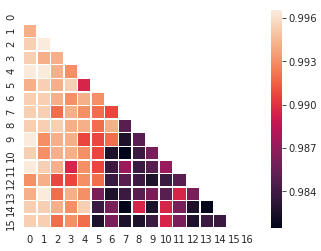

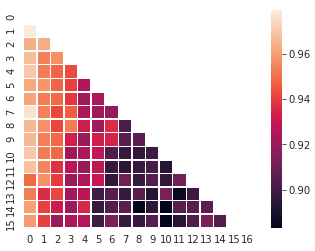

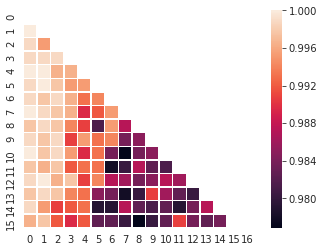

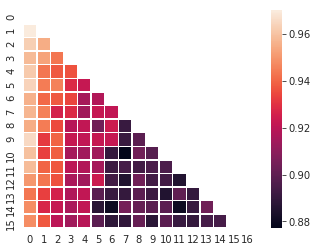

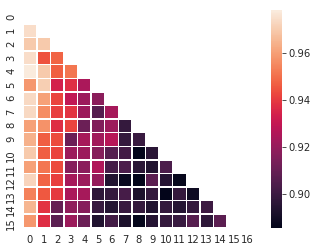

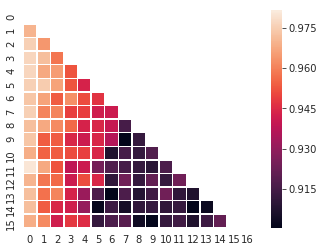

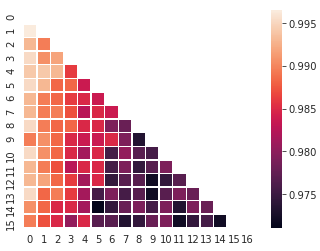

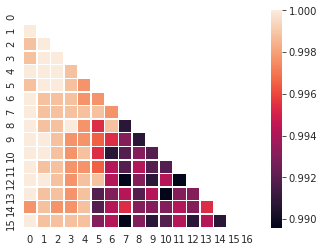

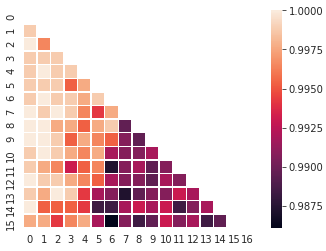

In [70]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def read_dir(path):
    # file_list: list of file names
    file_list = os.listdir(path)
    return file_list


def acc_and_val_acc(file_list):
    acc = []
    val_acc = []
    for i in range(len(file_list)):
        (val_acc if i % 2 == 0 else acc).append(file_list[i])
    return acc, val_acc


def get_mean(acc):
    return np.mean(acc, axis=1)


def get_acc_matrix(score_path, acc):
    mat = np.zeros((16, 17, 9), dtype=float)
    for fname in acc:
        f = fname.split('_')
        fw = int(f[0])-3
        fws = int(f[1])-2
        res = np.load(score_path+'/'+fname)
        mean = get_mean(res)
        mat[fw][fws] = mean
    return mat


def subj2first(mat):
    res = np.zeros((mat.shape[2], mat.shape[0], mat.shape[1]))
    mat = mat.T
    for i in range(9):
        res[i] = mat[i].T
    return res


def sub_acc_mean(mat):
    return np.mean(mat, axis=0)


def print_mat(mat):
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            print('%.3f ' %mat[i][j], end='')
        print()


def draw_heatmap(mat, min, max):
#    plt.imshow(mat, cmap='hot', interpolation='nearest')
#    sns.heatmap(mat, linewidth=0.5)
    mask = np.zeros_like(mat)
    mask[np.triu_indices_from(mask)] = True    
    with sns.axes_style("white"):
        ax = sns.heatmap(mat, mask=mask, vmin=min, vmax=max, square=True, linewidth=0.5)
    plt.show()

if __name__ == '__main__':
    score_path = '../score'
    file_list = read_dir(score_path)
    del file_list[file_list.index('.DS_Store')]
    file_list.sort()
    acc, val_acc = acc_and_val_acc(file_list)
    mat = get_acc_matrix(score_path, val_acc)
    mat = subj2first(mat)
    for i in range(9):
        min = np.min(mat[i][mat[i].nonzero()])
        max = np.max(mat[i])
        draw_heatmap(mat[i], min, max)
#    sub_mat = sub_acc_mean(mat)
#    print_mat(mat[0])

